In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Types of graphs
- Bar graphs showing distribution of amount of rainfall.
- Distribution of amount of rainfall yearly, monthly, groups of months.
- Distribution of rainfall in subdivisions, districts form each month, groups of months.
- Heat maps showing correlation between amount of rainfall between months.


In [2]:
data = pd.read_csv("C:/Users/Vinoth Kumar R/Downloads/Telegram Desktop/rainfall-prediction-master/rainfall-prediction-master/data/rainfall_in_india_1901-2015.csv",sep=",")
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtypes: flo

## Dataset Description
- Data has 36 sub divisions and 19 attributes (individual months, annual, combinations of 3 consecutive months).
- For some of the subdivisions data is from 1950 to 2015.
- All the attributes has the sum of amount of rainfall in mm.

In [3]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.569044,35.896396,46.925176,67.798192,123.189974,234.568120,269.310313,188.678707,135.309591,99.434452,68.593545,42.318098,900.986632,59.265023,201.096692,706.881054,166.678751
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.475000,175.900000,156.150000,100.600000,14.600000,0.700000,0.100000,806.450000,4.100000,24.200000,574.375000,34.200000
50%,1958.000000,6.000000,6.700000,7.900000,15.700000,36.700000,138.900000,284.900000,259.500000,174.100000,65.750000,9.700000,3.100000,1125.450000,19.300000,75.200000,882.250000,98.800000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.700000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


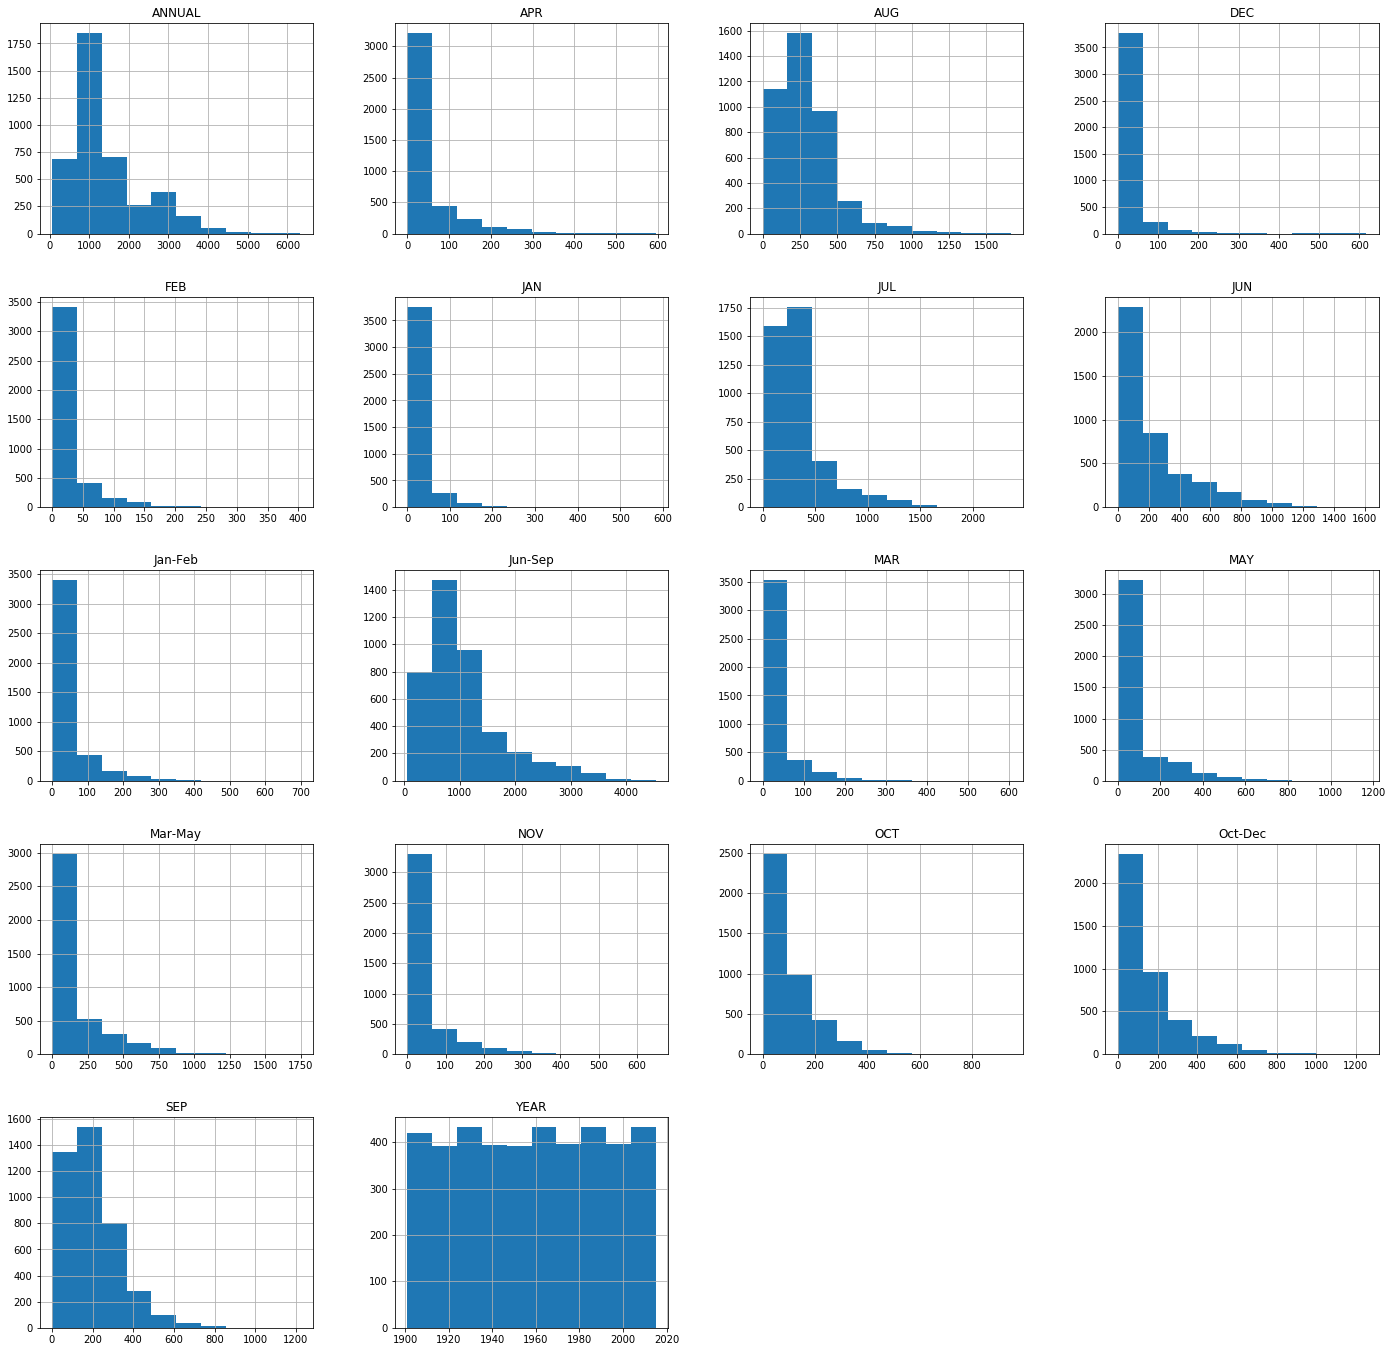

In [5]:
data.hist(figsize=(24,24));

## Observations
- Above histograms show the distribution of rainfall over months.
- Observed increase in amount of rainfall over months July, August, September.

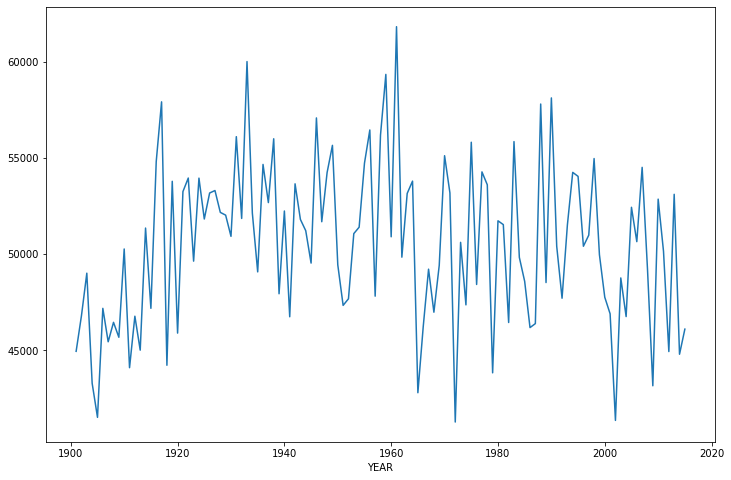

In [6]:
data.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));

## Observations
- Shows distribution of rainfall over years. 
- Observed high amount of rainfall in 1950s.

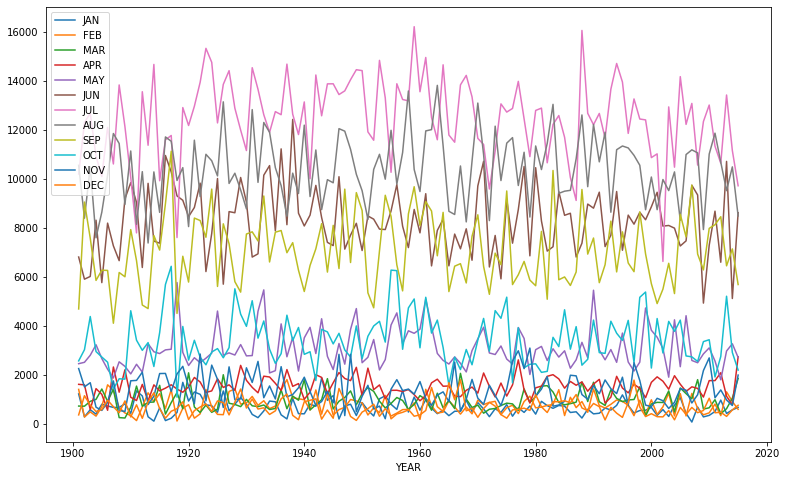

In [7]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8));

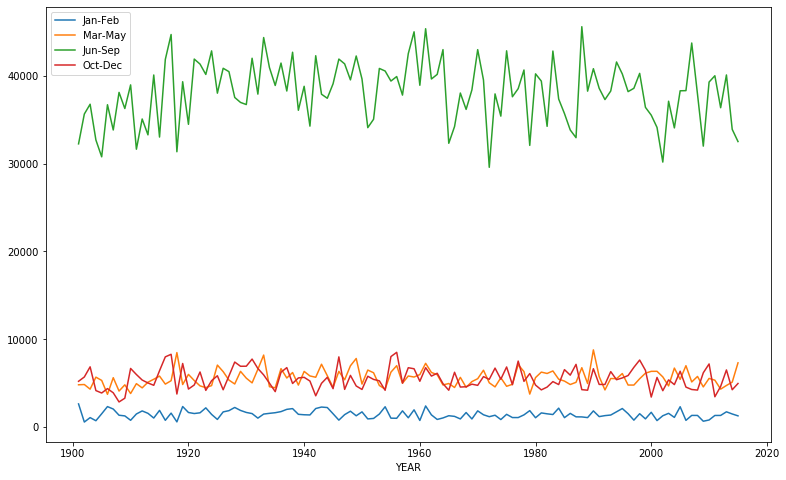

In [8]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8));

## Observations
- The above two graphs show the distribution of rainfall over months.
- The graphs clearly shows that amount of rainfall in high in the months july, aug, sep which is monsoon season in India.

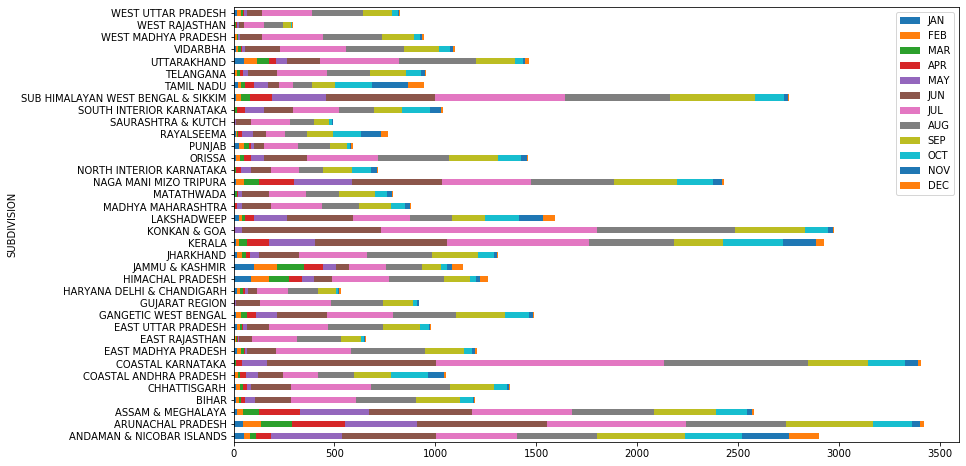

In [9]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

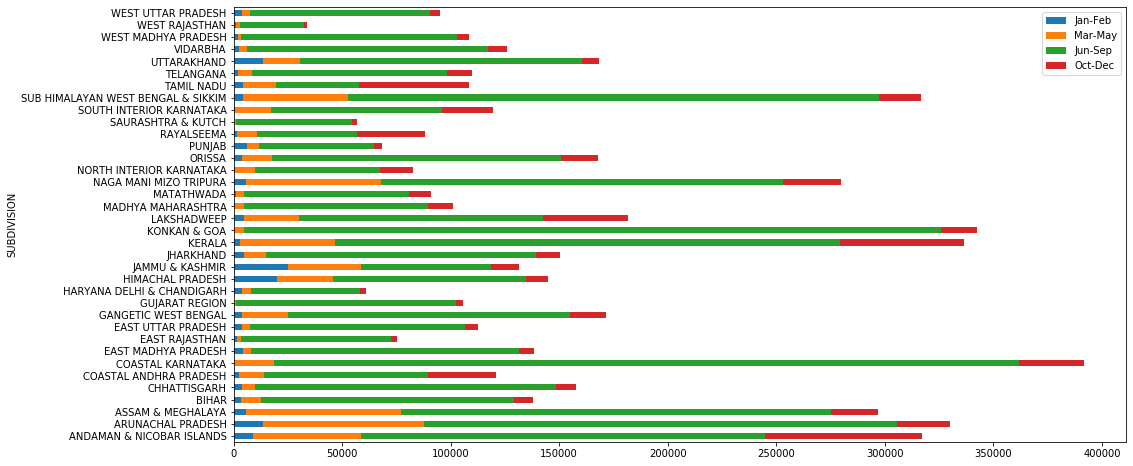

In [10]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

## Observations
- Above two graphs shows that the amount of rainfall is reasonably good in the months of march, april, may in eastern India. 

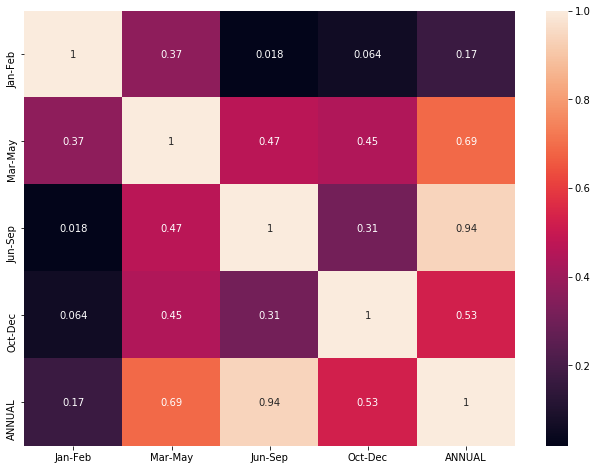

In [11]:
plt.figure(figsize=(11,8))
sns.heatmap(data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

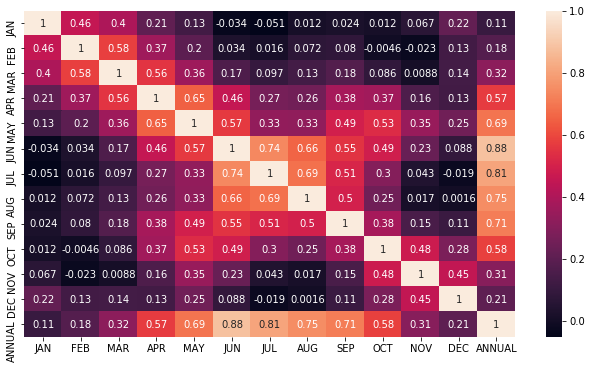

In [12]:
plt.figure(figsize=(11,6))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

## Observations
- **Heat Map** shows the co-relation(dependency) betwenn the amounts of rainfall over months.
- From above it is clear that if amount of rainfall is high in the months of july, august, september then the amount of rainfall will be high annually.
- It is also obwserved that if amount of rainfall in good in the months of october, november, december then the rainfall is going to b good in the overall year. 

In [13]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):        
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

## Predictions
- For prediction we formatted data in the way, given the rainfall in the last three months we try to predict the rainfall in the next consecutive month.
- For all the experiments we used 80:20 training and test ratio.
    - Linear regression
    - SVR
    - Artificial neural nets
- Tersting metrics: We used Mean absolute error to train the models.
- We also shown the amount of rainfall actually and predicted with the histogram plots.
- We did two types of trainings once training on complete dataset and other with training with only tamilnadu data
- All means are standard deviation observations are written, first one represents ground truth, second one represents predictions.


In [14]:
# seperation of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [15]:
#test 2010
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2010]

data_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TAMIL NADU'])

X_year_2010 = None; y_year_2010 = None
for i in range(data_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = data_2010[:, i:i+3]
        y_year_2010 = data_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, data_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, data_2010[:, i+3]), axis=0)


In [16]:
#test 2005
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2005]

data_2005 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TAMIL NADU'])

X_year_2005 = None; y_year_2005 = None
for i in range(data_2005.shape[1]-3):
    if X_year_2005 is None:
        X_year_2005 = data_2005[:, i:i+3]
        y_year_2005 = data_2005[:, i+3]
    else:
        X_year_2005 = np.concatenate((X_year_2005, data_2005[:, i:i+3]), axis=0)
        y_year_2005 = np.concatenate((y_year_2005, data_2005[:, i+3]), axis=0)


In [17]:
#test 2015
temp = data[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['YEAR'] == 2015]

data_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TAMIL NADU'])

X_year_2015 = None; y_year_2015 = None
for i in range(data_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = data_2015[:, i:i+3]
        y_year_2015 = data_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, data_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, data_2015[:, i+3]), axis=0)


In [18]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

96.32435229744084


MEAN 2005
147.3111111111111 154.89409610331137
Standard deviation 2005
97.07130763223547 70.26461054053196
MEAN 2010
120.15555555555557 138.52491051795914
Standard deviation 2010
80.8999397213223 58.06819529310172
MEAN 2015
130.25555555555556 144.14608860074196
Standard deviation 2015
93.7362625325986 70.61860433793966


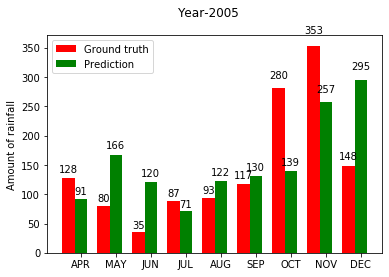

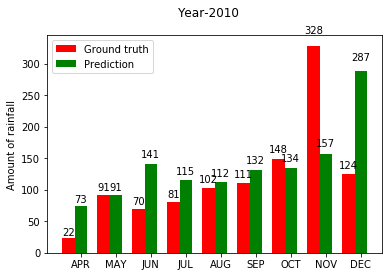

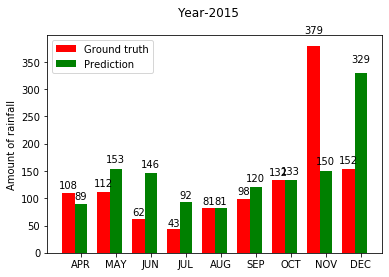

In [19]:

#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [20]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

127.1600615632603


MEAN 2005
147.3111111111111 154.89409610331137
Standard deviation 2005
97.07130763223547 70.26461054053196
MEAN 2010
120.15555555555557 138.52491051795914
Standard deviation 2010
80.8999397213223 58.06819529310172
MEAN 2015
130.25555555555556 144.14608860074196
Standard deviation 2015
93.7362625325986 70.61860433793966


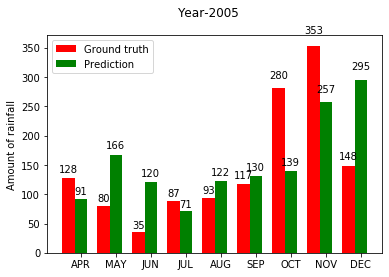

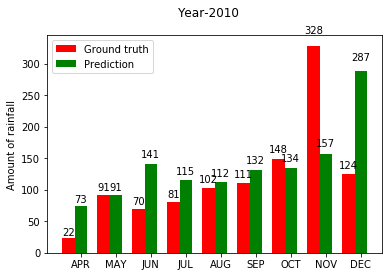

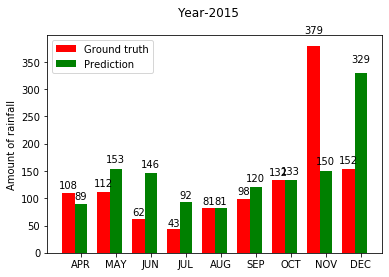

In [21]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)
print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [22]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 1)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 64)             192       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 128)            16512     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               49280     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080

In [23]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))


Train on 30005 samples, validate on 3334 samples
Epoch 1/10
30005/30005 [==============================] - 7s 235us/step - loss: 19158.6402 - mae: 87.1812 - val_loss: 17436.5435 - val_mae: 84.3842
Epoch 2/10
30005/30005 [==============================] - 5s 165us/step - loss: 18582.7235 - mae: 86.4857 - val_loss: 18008.5904 - val_mae: 90.0884
Epoch 3/10
30005/30005 [==============================] - 5s 158us/step - loss: 18357.9601 - mae: 86.1600 - val_loss: 17211.7193 - val_mae: 84.8119
Epoch 4/10
30005/30005 [==============================] - 5s 163us/step - loss: 18302.9167 - mae: 85.9506 - val_loss: 17293.0629 - val_mae: 85.8243
Epoch 5/10
30005/30005 [==============================] - 5s 159us/step - loss: 18315.7979 - mae: 85.9323 - val_loss: 17316.0606 - val_mae: 83.8115
Epoch 6/10
30005/30005 [==============================] - 5s 163us/step - loss: 18190.4314 - mae: 85.4565 - val_loss: 17380.2122 - val_mae: 87.1823
Epoch 7/10
30005/30005 [==============================] - 13s 

MEAN 2005
147.3111111111111 154.89409610331137
Standard deviation 2005
97.07130763223547 70.26461054053196
MEAN 2010
120.15555555555557 138.52491051795914
Standard deviation 2010
80.8999397213223 58.06819529310172
MEAN 2015
130.25555555555556 144.14608860074196
Standard deviation 2015
93.7362625325986 70.61860433793966


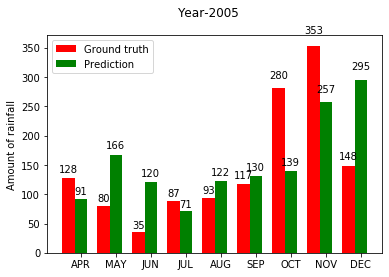

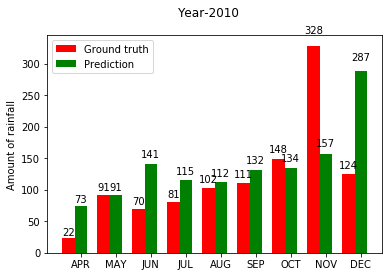

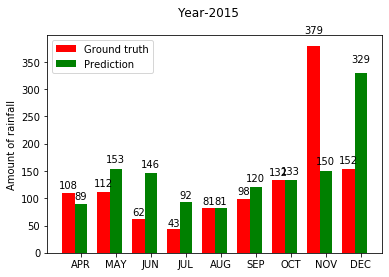

In [24]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [25]:
# spliting training and testing data only for tamilnadu
tamilnadu = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[data['SUBDIVISION'] == 'TAMIL NADU'])

X = None; y = None
for i in range(tamilnadu.shape[1]-3):
    if X is None:
        X = tamilnadu[:, i:i+3]
        y = tamilnadu[:, i+3]
    else:
        X = np.concatenate((X, tamilnadu[:, i:i+3]), axis=0)
        y = np.concatenate((y, tamilnadu[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)        

In [26]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

37.419853700246996


MEAN 2005
147.3111111111111 111.15287168624565
Standard deviation 2005
97.07130763223547 32.87540585923575
MEAN 2010
120.15555555555557 101.35072505381403
Standard deviation 2010
80.8999397213223 30.369182563251652
MEAN 2015
130.25555555555556 104.79014811753537
Standard deviation 2015
93.7362625325986 27.63138542089741


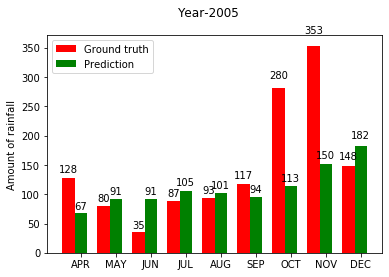

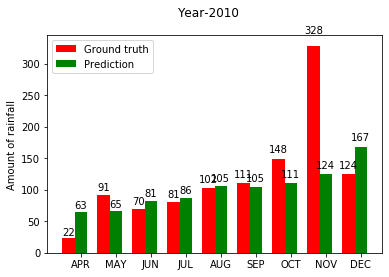

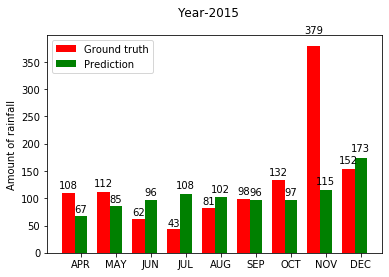

In [27]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [28]:
from sklearn.svm import SVR

# SVM model
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

39.08083930391495


MEAN 2005
147.3111111111111 111.15287168624565
Standard deviation 2005
97.07130763223547 32.87540585923575
MEAN 2010
120.15555555555557 101.35072505381403
Standard deviation 2010
80.8999397213223 30.369182563251652
MEAN 2015
130.25555555555556 104.79014811753537
Standard deviation 2015
93.7362625325986 27.63138542089741


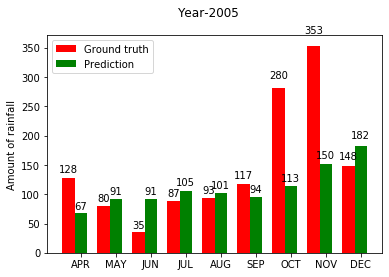

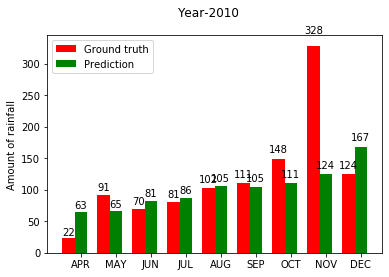

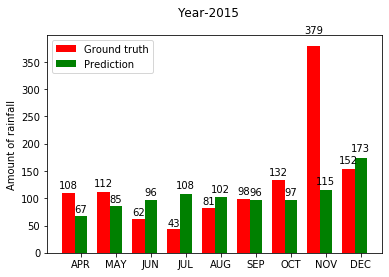

In [29]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [30]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print(mean_absolute_error(y_test, y_pred))

Train on 921 samples, validate on 103 samples
Epoch 1/10
921/921 [==============================] - 0s 201us/step - loss: 5857.5407 - mae: 59.0850 - val_loss: 5040.0638 - val_mae: 51.0546
Epoch 2/10
921/921 [==============================] - 0s 199us/step - loss: 4619.2548 - mae: 48.5622 - val_loss: 4340.1913 - val_mae: 47.9367
Epoch 3/10
921/921 [==============================] - 0s 179us/step - loss: 4098.5475 - mae: 48.2092 - val_loss: 4049.0247 - val_mae: 46.0367
Epoch 4/10
921/921 [==============================] - 0s 190us/step - loss: 3887.2704 - mae: 45.0722 - val_loss: 3918.8335 - val_mae: 44.6291
Epoch 5/10
921/921 [==============================] - 0s 180us/step - loss: 3733.3460 - mae: 45.5067 - val_loss: 3809.7137 - val_mae: 43.6893
Epoch 6/10
921/921 [==============================] - 0s 177us/step - loss: 3656.6455 - mae: 44.1687 - val_loss: 3725.6521 - val_mae: 43.2211
Epoch 7/10
921/921 [==============================] - 0s 174us/step - loss: 3637.7205 - mae: 44.8531 -

MEAN 2005
147.3111111111111 111.15287168624565
Standard deviation 2005
97.07130763223547 32.87540585923575
MEAN 2010
120.15555555555557 101.35072505381403
Standard deviation 2010
80.8999397213223 30.369182563251652
MEAN 2015
130.25555555555556 104.79014811753537
Standard deviation 2015
93.7362625325986 27.63138542089741


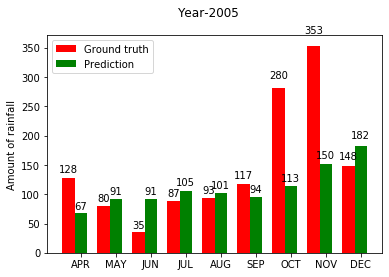

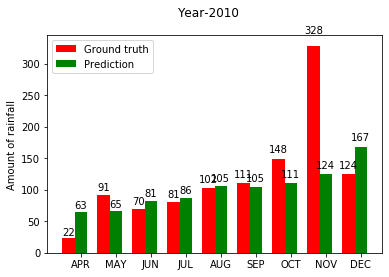

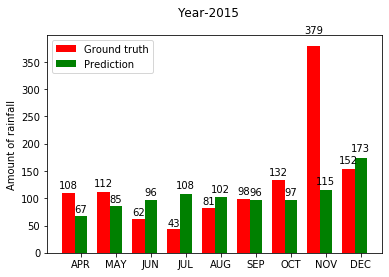

In [31]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)
    
#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005),np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print("MEAN 2010")
print(np.mean(y_year_2010),np.mean(y_year_pred_2010))
print("Standard deviation 2010")
print(np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print("MEAN 2015")
print(np.mean(y_year_2015),np.mean(y_year_pred_2015))
print("Standard deviation 2015")
print(np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

## Prediction Observations

### Training on Complete Dataset

|Algorithm|MAE|
|---------|---|
|Linear Regression|96.32435229744084|
|SVR|127.1600615632603|
|Artificial neural nets|86.64192137579357|

### Training on Tamil Nadu Dataset

|Algorithm| MAE|
|---------|----|
|Linear Regression| 37.419853700246996|
|SVR| 39.08083930391495|
|Artificial neural nets |32.8238147388805|

- Neural Networks performs better than SVR etc.
- Bad performance by SVR model.
- Observed MAE is very high which indicates machine learning models won't work well for prediction of rainfall.
- Analysed individual year rainfall patterns for 2005, 2010, 2015.
- Approximately close means, noticed less standard deviations.

## Conclusions
- Various visualizations of data are observed which helps in implementing the approaches for prediction.
- Prediction of amount of rainfall for both the types of dataset.
- Observations indicates machine learning models won't work well for prediction of rainfall due to fluctutaions in rainfall.